#Eigenfaces

Explore an application of PCA in image analysis.

In [1]:
%matplotlib inline 
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
img_path = 'images/images/'

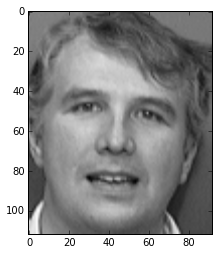

In [3]:
img = misc.imread(img_path + '67.pgm')
plt.imshow(img,cmap = plt.cm.gray)

In [4]:
img_vec = img.flatten()
img_mat=img_vec

for i in range(2,401):
    img = misc.imread(img_path + str(i)+'.pgm')
    img_vec = img.flatten()
    img_mat = np.vstack((img_mat, img_vec))

Center the data matrix.

In [5]:
data = np.array(img_mat)
mean = data.mean(axis = 0)
centered_data = data - mean
print centered_data

[[ 33.205   37.2375  36.88   ...,   1.0525  -3.93    -0.3   ]
 [-25.795  -25.7625 -24.12   ..., -44.9475 -41.93   -41.3   ]
 [-46.795  -41.7625 -33.12   ..., -47.9475 -49.93   -46.3   ]
 ..., 
 [ 25.205   28.2375  25.88   ...,  11.0525  10.07    16.7   ]
 [ 24.205   26.2375  26.88   ...,  15.0525  11.07    14.7   ]
 [ 25.205   25.2375  23.88   ...,  11.0525   3.07    14.7   ]]


Do a SVD of the centered data matrix.

In [6]:
U, s, V = np.linalg.svd(centered_data, full_matrices=0)

Pick top-k singular values and vectors for k = 1, 10, 50, 100, 150, 200, 250, 400 singular values and project onto respective dimensions.

In [7]:
S=np.diag(s)
KVal=[1,10,50,100,150,200,250,400]
PCA_matrix=[]
for K in KVal:
    temp=np.dot(U[:,:K],np.dot(S[:K,:K],V[:K,:]))
    PCA_matrix.append(temp)

Pick any one image and plot for each top-k projection in previous steps.

In [8]:
img_graph=66
img_width = 112
img_height = 92

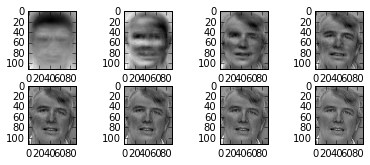

In [9]:
import pylab
f = pylab.figure()
f.subplots_adjust(hspace=1,wspace=1)
for k in range(8):
    rec_img=np.reshape(PCA_matrix[k][img_graph,:],(img_width,img_height))
    if k<4:
        f.add_subplot(2, 4, k+1)
    else:
        f.add_subplot(1, 4, k-3)
    pylab.imshow(rec_img, cmap=plt.cm.gray)
pylab.show()